# Example notebook for operations with .gds files with pyMOE

In the following we exemplify how make operations in .gds files using the gds_klops module including:
* Change layers within a .gds file 
* Make an array from an existing .gds file 
* Import one .gds file into another .gds file
* Rescale all the .gds layout by a factor 
* Pass a .gds file into a .dxf file 

In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')
sys.path.insert(0,'../../..')

In [2]:
import pyMOE as moe 
import pyMOE.generate as gen 
import pyMOE.export as exp 
import pyMOE.gds_klops as gdsops 

## Preliminary: Generate a Fresnel Phase Mask 

<IPython.core.display.Javascript object>


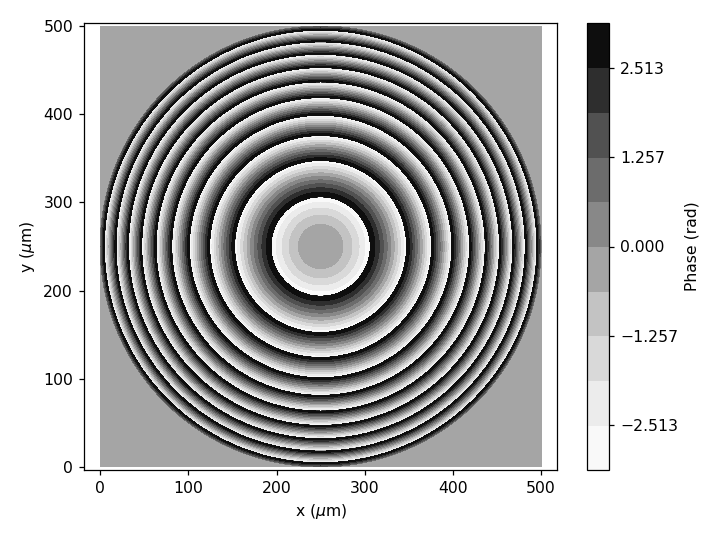

Passing contours into GDS. 
Saved the phase profile with 10 layers into the file fresnel_phase_mask.gds


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
####generate a fresnel phase mask and save it into gds  

npix = 5000 # nr of pixels 
foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
xsiz = 500 #x-size in um 
ysiz = 500 #y-size in um 
n = 10  # number of gray levels 
gdsname = "fresnel_phase_mask.gds" # name of gds file

moe.gen.fresnel_phase_mask(npix, foc, lda, xsiz, ysiz, n, filename=gdsname, plotting=True)

## Operations with/on .gds files

Using the generated fresnel phase mask .gds file, below it is demonstrated how to make some operations with the .gds using the gds_klops module 

In [4]:
#Exemplifying the change_layers function 
import numpy as np

fstgds_filename = "fresnel_phase_mask.gds"
fst_cellname = "TOP"
#layers in the original file (here is just from 0 to n)
layerspol = np.arange(0,n,dtype=int)
# the correspondence is one-to-one to layerspol 
gvts = layerspol+5 
output_filename = "fresnel_phase_mask_newlayers.gds"

moe.gdsops.change_layers(fstgds_filename, fst_cellname, layerspol, gvts, output_filename)


Changed the shapes in layer 0 into 5
Changed the shapes in layer 1 into 6
Changed the shapes in layer 2 into 7
Changed the shapes in layer 3 into 8
Changed the shapes in layer 4 into 9
Changed the shapes in layer 5 into 10
Changed the shapes in layer 6 into 11
Changed the shapes in layer 7 into 12
Changed the shapes in layer 8 into 13
Changed the shapes in layer 9 into 14
Changed layers - wrote result to fresnel_phase_mask_newlayers.gds


In [9]:
#Do an instance array

input_filename = "fresnel_phase_mask_newlayers.gds"
cell_name = "top" #name of the cell for instance array cannot be the same as the input gds filename
transx = 1000  #translation vector in X  in um
transy = 1000  #translation vector in Y  in um 
nr_inst_X = 3  #number of instances in X 
nr_inst_Y = 3  #number of instances in Y 
pitx = xsiz   #translation in X in um - use same dist as in the generated mask 
pity = ysiz   #translation in Y in um
output_filename = "fresnel_phase_mask_newlayers_"+str(nr_inst_X)+"x"+str(nr_inst_Y)+".gds"


moe.gdsops.instance_array(cell_name, input_filename, transx, transy, nr_inst_X, nr_inst_Y, pitx, pity, output_filename)


The cell_name needs to be different than the top cell name in fresnel_phase_mask_newlayers.gds .


In [6]:
##import a .gds file into another .gds

fstgds_filename = "fresnel_phase_mask_newlayers_"+str(nr_inst_X)+"x"+str(nr_inst_Y)+".gds"
fst_cellname = cell_name 
sndgds_filename = "fresnel_phase_mask.gds"
snd_cellname = "TOP"
output_filename = "fresnel_phase_mask+fresnelarray.gds"

#Only need to loop through the layers 
for ids, layin in enumerate(layerspol): 
    if ids == 0 :
        moe.gdsops.import_gds(fstgds_filename, fst_cellname, int(layin), int(0), \
               sndgds_filename, snd_cellname,  int(layin), int(0), \
               output_filename, clear_gds = False)
    else: 
        moe.gdsops.import_gds(output_filename, fst_cellname, int(layin), int(0), \
               sndgds_filename, snd_cellname, int(layin), int(0), \
               output_filename, clear_gds = False)



Imported fresnel_phase_mask.gds layer 0 into fresnel_phase_mask_newlayers_3x3.gds layer 0. Output file fresnel_phase_mask+fresnelarray.gds .
Imported fresnel_phase_mask.gds layer 1 into fresnel_phase_mask+fresnelarray.gds layer 1. Output file fresnel_phase_mask+fresnelarray.gds .
Imported fresnel_phase_mask.gds layer 2 into fresnel_phase_mask+fresnelarray.gds layer 2. Output file fresnel_phase_mask+fresnelarray.gds .
Imported fresnel_phase_mask.gds layer 3 into fresnel_phase_mask+fresnelarray.gds layer 3. Output file fresnel_phase_mask+fresnelarray.gds .
Imported fresnel_phase_mask.gds layer 4 into fresnel_phase_mask+fresnelarray.gds layer 4. Output file fresnel_phase_mask+fresnelarray.gds .
Imported fresnel_phase_mask.gds layer 5 into fresnel_phase_mask+fresnelarray.gds layer 5. Output file fresnel_phase_mask+fresnelarray.gds .
Imported fresnel_phase_mask.gds layer 6 into fresnel_phase_mask+fresnelarray.gds layer 6. Output file fresnel_phase_mask+fresnelarray.gds .
Imported fresnel_ph

In [7]:
# rescaling the layout 
readfile = "fresnel_phase_mask+fresnelarray.gds"
cellname = "TOP"
factor = 2 #Factor to rescale the layout to 
outfile = "fresnel_phase_mask+fresnelarray_rescale.gds"


moe.gdsops.rescale_layout(readfile, cellname, factor, outfile, divfactor=1)

Rescaled fresnel_phase_mask+fresnelarray.gdsby a factor of 2.0
Saved the result to fresnel_phase_mask+fresnelarray_rescale.gds


In [8]:
#export .gds to .dxf
ingds = "fresnel_phase_mask+fresnelarray_rescale.gds"
outdxf = "fresnel_phase_mask+fresnelarray_rescale.dxf"


moe.gdsops.gds_to_dxf(ingds, outdxf)

In [38]:
def grayim2gds_writer_klops(infile,  output_filename , pixelx, pixely, cellname, level, layer=0, datatype=0 , verbose=False):
    """
    (void) Transforms one image (converted to grayscale) into a gds, using cv2 for reading the image
    by default adds the image to (layer, datatype) = (0,0)
    'infile'  = input IMAGE file (on extension that cv2 can read ), e.g. "image.png"
    'output_filename' = intermediate GDS file
    'pixelx'  = pixel size in x, in um 
    'pixely'  = pixel size in y, in um 
    'cellname'= string with cellname, e.g. "TOP"
    'level'   = int from 0 to 255 (0 = black, 255=white) , pixels gray value to be passed to GDS 

    optional:
    'layer' = gray level, defaults to 0 
    'datatype' = gds datatype, defaults to 0 
    'verbose' defaults to False, if True prints 

    """
    
    import cv2
    import gdspy 
    import numpy as np
    
    img = cv2.imread(infile, cv2.IMREAD_GRAYSCALE)
    
    if img is not None: 
        print("Sucessfully imported img!")
        
    h,w = img.shape 
    print(h)
    print(w) 
    
    nmx = w
    nmy = h
    
    harray = np.arange(0,h+1,nmy)
    warray = np.arange(0,w+1,nmx)
    #print(harray)
    
    lib = gdspy.GdsLibrary()
    gdspy.current_library = gdspy.GdsLibrary() 

    outfile="image.gds"
    writer = gdspy.GdsWriter(outfile,unit=1.0e-6,precision=1.0e-9)
    cell = lib.new_cell(cellname)
    
    i=0 
    j=0 
    
    rect = gdspy.Rectangle((pixelx*j,-pixely*i),(pixelx*(j+1), -pixely*(i+1)), layer, datatype)                   
    cell.add(rect)        
    writer.write_cell(cell)
    writer.close()
    
    print("Exported the image file "+str(infile) + " into " + str(outfile))
    
    #####--------------------------------
    print("Starting making instances")
    
    import pya
    
    layout = pya.Layout()
    
    #input_filename = "fresnel_phase_mask_newlayers.gds"
    cell_name = "TOP" #name of the cell for instance array cannot be the same as the input gds filename

    #create cell at top 
    top = layout.create_cell(cell_name)

    #gds files to read (could also be a list)
    gds_files = [outfile]

    for file in gds_files:
        layout.read(file) #read the files

        for top_cll in layout.top_cells():
            if (top_cll.name != cell_name): #Don't insert in the top_cell
                cell_index = top_cll.cell_index()

                for hn, hi in enumerate(harray):
                    if hn == (len(harray)-1):
                        break
                    #print(hi)
                    for hw, wi in enumerate(warray):
                        if hw == (len(warray)-1): 
                            break   
                        #print(wi)

                        for i in np.arange(hi,hi+nmy):
                            if verbose == True: 
                                print(i/h)
                            
                            for j in np.arange(wi, wi+nmx):
                                #print(j/w)
                                #here we can also think of selectin pixels at a certain level only
                                #and creating a GDS from a grayscale image 
                                if img[i][j] == int(level):
                                    new_instance = pya.CellInstArray( cell_index, pya.Trans(pya.Vector(int(j*1000),int(i*1000))), pya.Vector(0, 0), pya.Vector(0, 0), 0, 0)
                                    top.insert( new_instance ) #insert the cell in the array
            
    #write to gds
    layout.write(output_filename)
    print("Done")

In [39]:

infile = "fresnel_phase_mask_ditherx.tiff"
outfile = "fresnel_phase_mask_dithered2.gds"
cellname = "tops" #name of the gds cell 
graycolor = 0 #black pixels 
pixelx = 1 #um 
pixely = 1 #um 

###Change the dither to use the instance, to reduce the files  

grayim2gds_writer_klops(infile, outfile, pixelx, pixely, cellname, 0, layer=0, datatype=0 , verbose=False)

Sucessfully imported img!
500
500
Exported the image file fresnel_phase_mask_ditherx.tiff into image.gds
Starting making instances
Done
